In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt 

In [38]:
N = 50
D = 1
dx = 1/N
w = 1.8
e = 10**(-5)

In [39]:
def init(N):
    grid = np.zeros((N,N))
    grid[0] = np.ones(N)
    return grid

In [40]:
def analytic(Y, t, t_max, D):
    c = 0
    for i in range(t_max):
        Z_neg = (1 - Y + 2*i) / (2* np.sqrt(D*t))
        Z_pos = (1 + Y + 2*i) / (2* np.sqrt(D*t))
        c = c + math.erfc(Z_neg) - math.erfc(Z_pos)
    return c

1.4 Jacobi iteration

In [5]:
def update_J(Y):
    Y_prev = np.copy(Y)
    for j in range(1, len(Y)-1):
        for i in range(len(Y)):
            if i == 0:
                 Y[j,i] = (1/4) * (Y_prev[j+1,i] + Y_prev[j-1,i]+ Y_prev[j,i+1] +Y_prev[j,-1]) 
            elif i == N-1:
                 Y[j,i] = (1/4) * (Y_prev[j+1,i] + Y_prev[j-1,i]+ Y_prev[j,0] +Y_prev[j,i-1]) 
            else:
                 Y[j,i] = (1/4) * (Y_prev[j+1,i] + Y_prev[j-1,i]+ Y_prev[j,i+1] +Y_prev[j,i-1])
    return(Y)  

1.5 The Gauss_Seidel iteration

In [6]:
def update_GS(Y):
    for j in range(1, len(Y)-1):
        for i in range(len(Y)):
            if i == 0:
                 Y[j,i] =  (1/4) * (Y[j+1,i] + Y[j-1,i] + Y[j,i+1] + Y[j,-1]) 
            elif i == N-1:
                 Y[j,i] =  (1/4) * (Y[j+1,i] + Y[j-1,i] + Y[j,0] + Y[j,i-1]) 
            else:
                 Y[j,i] =  (1/4) * (Y[j+1,i] + Y[j-1,i] + Y[j,i+1] + Y[j,i-1])
    return(Y)  

1.6 Successice Over Relaxation

In [7]:
def update_SOR(Y, w, objects = []):
    for j in range(1, len(Y)-1):
        for i in range(len(Y)):
            if i == 0:
                 Y[j,i] = (1-w)*Y[j,i] + (w/4) * (Y[j+1,i] + Y[j-1,i] + Y[j,i+1] + Y[j,-1]) 
            elif i == N-1:
                 Y[j,i] = (1-w)*Y[j,i] + (w/4) * (Y[j+1,i] + Y[j-1,i] + Y[j,0] + Y[j,i-1]) 
            else:
                 Y[j,i] = (1-w)*Y[j,i] + (w/4) * (Y[j+1,i] + Y[j-1,i] + Y[j,i+1] + Y[j,i-1])
        if len(objects) > 0:
            Y[objects[0,0]:objects[0,1], objects[1,0]:objects[1,1]] = 0
            if len(objects) == 4:
                Y[objects[2,0]:objects[2,1], objects[3,0]:objects[3,1]] = 0    
    return(Y)  

In [8]:
def iterative(model_type, e, w, N=50):
    Y = init(N)
    k = 1
    if model_type == 0:      # Jacobian iteration
        Y_prev = np.copy(Y)
        Y = update_J(Y)
        diff = np.abs(Y - Y_prev)
        diff_val = np.amax(diff)
        while(diff_val > e):
            k = k+1
            Y_prev = np.copy(Y)
            Y = update_J(Y)
            diff = np.abs(Y - Y_prev)
            diff_val = np.amax(diff)
    if model_type == 1:       # Gauss_Seidel iteration
        Y_prev = np.copy(Y)
        Y = update_GS(Y)
        diff = np.abs(Y - Y_prev)
        diff_val = np.amax(diff)
        while(diff_val > e):
            k = k+1
            Y_prev = np.copy(Y)
            Y = update_GS(Y)
            diff = np.abs(Y - Y_prev)
            diff_val = np.amax(diff)
    if model_type == 2:      # Successice Over Relaxation iteration
        Y_prev = np.copy(Y)
        Y = update_SOR(Y, w)
        diff = np.abs(Y - Y_prev)
        diff_val = (np.amax(diff))
        while(diff_val > e):
            k = k+1
            Y_prev = np.copy(Y)
            Y = update_SOR(Y, w)
            diff = np.abs(Y - Y_prev)
            diff_val = (np.amax(diff))
    return(Y, k)

In [ ]:
grid_0, total_iterations_0 = iterative(0, e, w)
grid_1, total_iterations_1 = iterative(1, e, w)
grid_2, total_iterations_2 = iterative(2, e, w)
print("Jacobian iteration till convergence: " , total_iterations_0)
plt.imshow(grid_0)
plt.show()
print("Gaus-Seidel iteration till convergence: " , total_iterations_1)
plt.imshow(grid_1)
plt.show()
print("SOR iteration till convergence: " , total_iterations_2)
plt.imshow(grid_2)
plt.show()

In [ ]:
C_list = []
for y in np.arange(0, 1, 0.01):
    C = analytic(y, 1, 1000, D)
    C_list.append(C)
C_list.reverse() # 

In [ ]:
plt.plot(C_list, np.arange(1, 0, 0.01), label = "Analytic")
plt.plot(grid_0[:,0], np.linspace(1,0,N), label = "Jacobian iteration")
plt.plot(grid_1[:,0], np.linspace(1,0,N), label = "GS iteration")
plt.plot(grid_2[:,0], np.linspace(1,0,N), label = "SOR iteration")
plt.legend()
plt.show()

plt.plot(C_list, np.arange(1, 0, 0.01), label = "Analytic")
plt.plot(grid_0[:,0], np.linspace(1,0,N), label = "Jacobian iteration")
plt.plot(grid_1[:,0], np.linspace(1,0,N), label = "GS iteration")
plt.plot(grid_2[:,0], np.linspace(1,0,N), label = "SOR iteration")
plt.ylim(0.45, 0.55)
plt.xlim(0.45, 0.55)
plt.legend()
plt.show()

KeyboardInterrupt: 

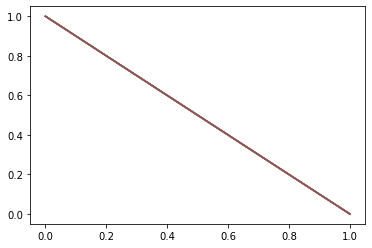

In [54]:
iter_list = [np.zeros()

for w in np.arange(1.7,2,0.05):
    w = round(w,2)
    for N in np.arange(50, 150, 5):
        grid, k = iterative(2, e, w, N)
        iter_list.append(k)        
        
plt.legend()
plt.show()

K)

In [ ]:
def SOR_objects(Y, w, ob):
    Y_prev = np.copy(Y)
    Y = update_SOR(Y, w, ob)
    diff = np.abs(Y - Y_prev)
    diff_val = (np.amax(diff))
    k = 1
    while(diff_val > e):JOe
        k=k+1
        Y_prev = np.copy(Y)
        Y = update_SOR(Y, w, ob)
        diff = np.abs(Y - Y_prev)
        diff_val = (np.amax(diff))
    return(Y, k)

In [ ]:
Y = init(N)
# ob = [(20,30), (20,30)]
# ob = [(10, 20), (10, 40)]
ob = np.array([[10, 20], [10, 20], [10, 20], [30, 40]])
print(ob[0,0])
grid_obj, iterations = SOR_objects(Y,w, ob)


In [ ]:
print (iterations)
plt.imshow(grid_obj)
plt.show()